# P4DS Final Project: BankChurners Dataset

Nhóm 26:
Sinh viên thực hiện:
- 23122035 - Châu Văn Minh Khoa
- 23122046 - Phan Ngọc Quân 

## I. DATA COLLECTION

### Dữ liệu của bạn là về chủ đề gì?


- Ngành ngân hàng bán lẻ chịu áp lực lớn trong việc giữ chân khách hàng thẻ tín dụng; nếu khách đóng tài khoản thì doanh thu từ phí và lãi giảm đáng kể.


- Bộ dữ liệu BankChurners ghi nhận hồ sơ khách hàng cá nhân, thói quen sử dụng thẻ, tương tác dịch vụ và trạng thái rời bỏ (`Attrition_Flag`) để đo lường khả năng trung thành.


- Mục tiêu: xây dựng nền tảng phân tích để nhận diện sớm nguy cơ rời bỏ, từ đó đề xuất chương trình chăm sóc hoặc ưu đãi phù hợp giúp duy trì khách hàng giá trị.


- Việc mô hình hóa churn hỗ trợ nhóm kinh doanh tối ưu chi phí marketing, đồng thời cải thiện trải nghiệm khách hàng dựa trên hành vi thực tế.

### Nguồn dữ liệu
- Nguồn: Kaggle – Credit Card Customers (tệp `BankChurners.csv`, https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).
- Public date(Kaggle): December 1, 2024

### Quyền sử dụng
- License: CC0-Public Domain, được chia sẻ cho mục đích học tập và nghiên cứu.


- Mục đích sử dụng: phục vụ môn học, tuân thủ điều khoản Kaggle; dữ liệu đã được ẩn danh nhưng vẫn cần tránh suy diễn định danh cá nhân cụ thể.


- Lưu ý đạo đức: các biến tài chính nên được diễn giải có trách nhiệm, không gán nhãn tiêu cực cho nhóm khách hàng cụ thể; khi chia sẻ kết quả cần nêu rõ đây là dữ liệu giả lập/ẩn danh.

### Người ta thu thập dữ liệu như thế nào?
Các bước thực hiện:
- Đăng nhập vào website https://leaps.analyttica.com/home.
- Click on the 'Apply' tab trên góc trên bên trái
- Ở đây, ta có thể tìm thấy nhiều vấn đề của các doanh nghiệp để giải quyết cùng với bộ dataset từ họ.

Ở trên là các bước thực hiện được ghi trên kaggle. Tuy nhiên, do bộ dữ liệu đã khá cũ nên cách trên hiện nay không hoạt động được. Nhóm em có check thử thì thấy trang web đã thay đổi tên miền.

### Mục đích lựa chọn dữ liệu này


- Tập dữ liệu gọn (10k dòng) nhưng đa dạng biến về nhân khẩu học, lịch sử giao dịch, mức độ tương tác; phù hợp để luyện quy trình EDA, tiền xử lý và xây dựng mô hình phân loại churn.

- Bối cảnh ngân hàng quen thuộc với các bài toán khoa học dữ liệu hướng kinh doanh, thuận tiện để trình bày insight định lượng và gợi ý chiến lược.

### Mô tả dữ liệu


- Mỗi dòng: Một khách hàng thẻ tín dụng với trạng thái tiếp tục hay rời bỏ, kèm các đặc trưng nhân khẩu học và hành vi sử dụng thẻ.


- Các nhóm biến chính:


  - Định lượng: `Customer_Age`, `Months_on_book`, `Credit_Limit`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Avg_Utilization_Ratio`,...


  - Phân loại: `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.


- Mục tiêu phân tích: khám phá phân bố, xác định đặc trưng quan trọng ảnh hưởng churn, chuẩn bị cho mô hình dự báo `Attrition_Flag`.


- Thách thức: lớp churn chiếm tỷ lệ nhỏ (~16%), cần lưu ý khi xây dựng mô hình và đánh giá hiệu năng.




> Tóm lại, đây là bộ dữ liệu thực hành kinh điển cho bài toán churn trong lĩnh vực ngân hàng/thẻ tín dụng, thích hợp để minh họa pipeline EDA → tiền xử lý → mô hình phân loại và các khuyến nghị giữ chân khách hàng.

## III. DATA EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

### Dataset overview

#### Basic Information

##### Đọc dữ liệu

In [2]:
# Đọc dữ liệu
data_path = "data/BankChurners.csv"
df = pd.read_csv(data_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##### Số dòng và cột

In [3]:
rows, cols = df.shape
print(f"Số dòng: {rows}, Số cột: {cols}")

Số dòng: 10127, Số cột: 23


- Như vậy data có số dòng là 10.127 và số cột là 23.

##### Các dòng dữ liệu
Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại không?

In [4]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1327,778734108,Existing Customer,36,M,3,Uneducated,Married,$60K - $80K,Blue,16,...,1686.0,1252,434.0,0.575,1758,42,1.100,0.743,0.000615,0.999390
6633,778810083,Existing Customer,45,F,3,Graduate,Single,Less than $40K,Blue,35,...,4210.0,0,4210.0,1.027,4175,58,0.933,0.000,0.000314,0.999690
2757,710958033,Existing Customer,49,F,5,Uneducated,Single,Less than $40K,Blue,39,...,1993.0,0,1993.0,0.539,4075,76,0.689,0.000,0.000121,0.999880
9708,711161133,Attrited Customer,36,F,2,Unknown,Single,Less than $40K,Blue,36,...,6071.0,0,6071.0,0.912,9338,59,0.903,0.000,0.997000,0.002997
7444,716218908,Existing Customer,48,F,4,Doctorate,Single,Unknown,Blue,39,...,2845.0,919,1926.0,0.652,2635,43,1.263,0.323,0.000050,0.999950
9922,713293983,Existing Customer,52,M,3,Post-Graduate,Divorced,$60K - $80K,Blue,33,...,3388.0,2517,871.0,0.919,15313,91,0.784,0.743,0.000220,0.999780
9723,779914383,Existing Customer,34,M,1,Uneducated,Married,$60K - $80K,Blue,18,...,10488.0,1636,8852.0,0.681,14719,116,0.681,0.156,0.000110,0.999890
5404,714569958,Existing Customer,38,F,2,Unknown,Single,Less than $40K,Blue,28,...,3206.0,2459,747.0,0.696,3852,65,0.625,0.767,0.000075,0.999920
1155,713693958,Existing Customer,38,F,1,Uneducated,Single,Less than $40K,Blue,27,...,8638.0,0,8638.0,0.489,1295,29,0.381,0.000,0.000498,0.999500
5578,812465958,Existing Customer,53,F,3,Post-Graduate,Divorced,Unknown,Blue,48,...,12286.0,997,11289.0,0.726,4960,83,0.729,0.081,0.000139,0.999860


- Mỗi dòng tương ứng một khách hàng thẻ tín dụng, có vẻ không có dòng nào khác biệt bất thường.

##### Overall size

In [5]:
size_mb = os.path.getsize("data/BankChurners.csv") / (1024**2)
print(f"Dataset size: {size_mb:.2f} MB")

Dataset size: 1.45 MB


#### Data Integrity

##### Kiểm tra trùng lặp

In [6]:
# Kiểm tra trùng lặp hoàn toàn
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn: {duplicate_count}")
df[df.duplicated()]

Số dòng trùng lặp hoàn toàn: 0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


- Không có dòng nào bị trùng hoàn toàn cả.

##### Kiểm tra có dòng nào "empty" hoàn toàn không

In [7]:
empty_rows = df.isna().all(axis=1).sum()
print("Số dòng hoàn toàn trống:", empty_rows)

Số dòng hoàn toàn trống: 0


- Không có dòng nào hoàn toàn empty cả

#### Column Inventory

##### Ý nghĩa các cột

In [8]:
list(df.columns.values)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

| Cột | Ý nghĩa |
|---|---|
| CLIENTNUM | Định danh nội bộ của khách hàng trong hệ thống thẻ tín dụng. |
| Attrition_Flag | Trạng thái khách hàng: `Attrited Customer` (đã đóng) hoặc `Existing Customer` (còn hoạt động). |
| Customer_Age | Tuổi của khách hàng. |
| Gender | Giới tính (`M`/`F`). |
| Dependent_count | Số người phụ thuộc trong hộ gia đình. |
| Education_Level | Trình độ học vấn (High School, Graduate, Doctorate, Unknown,...). |
| Marital_Status | Tình trạng hôn nhân (Married, Single, Divorced,...). |
| Income_Category | Nhóm thu nhập hằng năm (ví dụ: `< $40K`, `$60K - $80K`). |
| Card_Category | Hạng thẻ tín dụng (Blue, Silver, Gold, Platinum). |
| Months_on_book | Số tháng khách hàng đã gắn bó với ngân hàng (tuổi thẻ). |
| Total_Relationship_Count | Tổng số sản phẩm tài chính khách hàng sở hữu. |
| Months_Inactive_12_mon | Số tháng không hoạt động trong 12 tháng gần nhất. |
| Contacts_Count_12_mon | Số lần nhân viên liên hệ khách trong 12 tháng gần nhất. |
| Credit_Limit | Hạn mức tín dụng hiện tại. |
| Total_Revolving_Bal | Số dư quay vòng (revolving balance) trên thẻ. |
| Avg_Open_To_Buy | Hạn mức còn lại trung bình (Credit_Limit - Total_Revolving_Bal). |
| Total_Amt_Chng_Q4_Q1 | Mức thay đổi tổng giá trị giao dịch giữa quý 4 và quý 1. |
| Total_Trans_Amt | Tổng giá trị giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Trans_Ct | Tổng số lượng giao dịch thẻ trong 12 tháng gần nhất. |
| Total_Ct_Chng_Q4_Q1 | Mức thay đổi số lượng giao dịch giữa quý 4 và quý 1. |
| Avg_Utilization_Ratio | Tỷ lệ sử dụng tín dụng trung bình (Total_Revolving_Bal / Credit_Limit). |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_1 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 1) hỗ trợ phân loại churn. |
| Naive_Bayes_Classifier_..._Education_Level_Months_Inactive_12_mon_2 | Xác suất từ mô hình Naive Bayes nội bộ (thành phần 2) bổ sung cho biến trên. |

##### Những cột có tiềm năng để phân tích chuyên sâu
Các cột về đặc tính tài khoản (Account / Relationship)

- Months_on_book

- Total_Relationship_Count

- Card_Category

- Credit_Limit

- Avg_Open_To_Buy

- Avg_Utilization_Ratio

##### Drop Columns
- Xóa cột "CLIENTNUM" vì cột này không mang thông tin để phân tích
- Xóa 2 cột cuối cùng "Naive_Bayes_Classifier..." vì 2 cột này không phải dữ liệu thực tế, được khuyến cáo nên xóa trên kaggle

In [9]:
if 'CLIENTNUM' in df.columns:
    df = df.drop(columns=['CLIENTNUM'])
# xóa 2 cột cuối cùng không phải dữ liệu thực tế
df = df.drop(columns=df.columns[-2:])


#### Data Types

##### Kiểu dữ liệu của từng cột

In [10]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

##### Các cột có kiểu dữ liệu không thích hợp
Nhìn chung thì các cột đều có dữ liệu phù hợp

##### Các cột cần convert data type

In [11]:
# # Chuẩn hóa nhãn Attrition_Flag về nhị phân 0/1
# if 'Attrition_Flag' in df.columns:
#     df['Attrition_Flag'] = (
#         df['Attrition_Flag']
#         .astype(str)
#         .str.strip()
#         .map({'Attrited Customer': 1, 'Existing Customer': 0})
#     )
#     if df['Attrition_Flag'].notna().all():
#         df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')
#     print('Đã chuẩn hóa Attrition_Flag (Attrited=1, Existing=0).')
# else:
#     print('Không tìm thấy cột Attrition_Flag trong DataFrame.')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- Như vậy các cột dữ liệu đã ổn để tiếp tục.

### Numerical Columns Analysis

Trước hết, ta cần filter các cột numerical

In [13]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

#### Distribution & Central Tendency

##### Distribution shape

In [14]:
skewness = df[numerical_cols].skew()
def get_shape(value):
    if -0.5 <= value <= 0.5:
        return "Approximately normal"
    elif value > 0.5:
        return "Right-skewed"
    else:
        return "Left-skewed"

distribution_shape = skewness.apply(get_shape)
distribution_shape

Customer_Age                Approximately normal
Dependent_count             Approximately normal
Months_on_book              Approximately normal
Total_Relationship_Count    Approximately normal
Months_Inactive_12_mon              Right-skewed
Contacts_Count_12_mon       Approximately normal
Credit_Limit                        Right-skewed
Total_Revolving_Bal         Approximately normal
Avg_Open_To_Buy                     Right-skewed
Total_Amt_Chng_Q4_Q1                Right-skewed
Total_Trans_Amt                     Right-skewed
Total_Trans_Ct              Approximately normal
Total_Ct_Chng_Q4_Q1                 Right-skewed
Avg_Utilization_Ratio               Right-skewed
dtype: object

##### Visualization

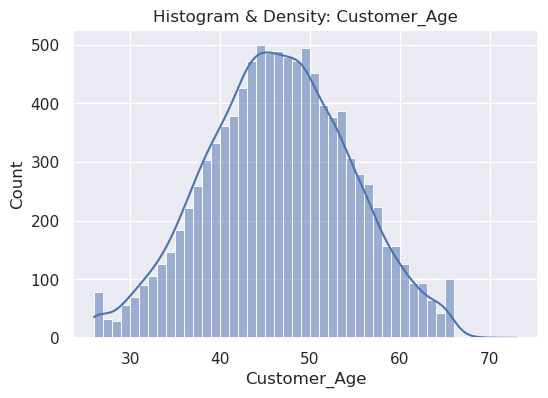

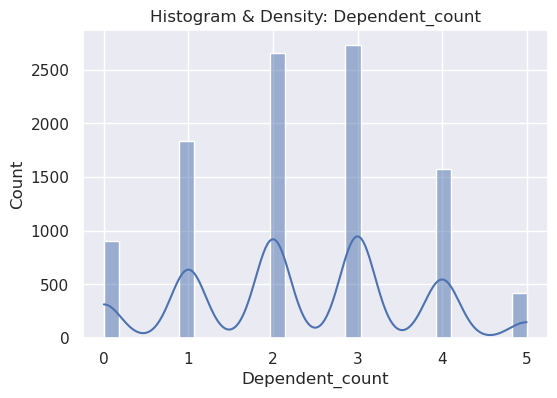

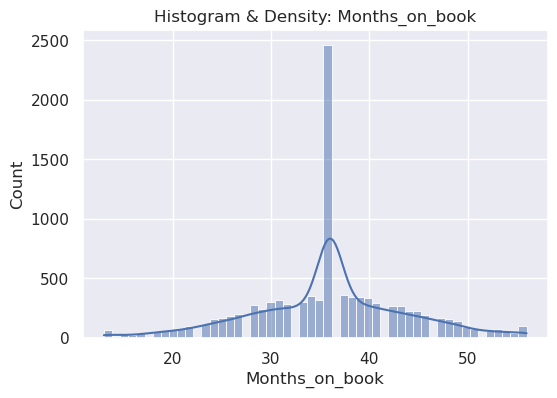

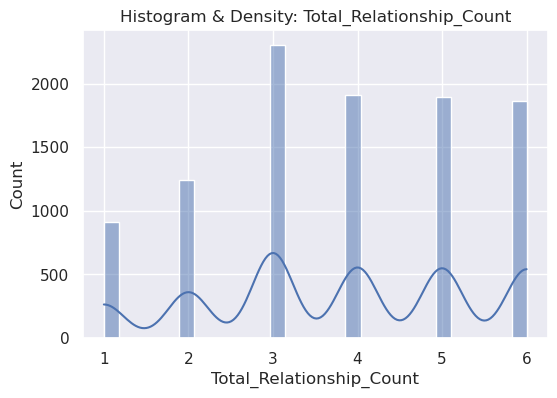

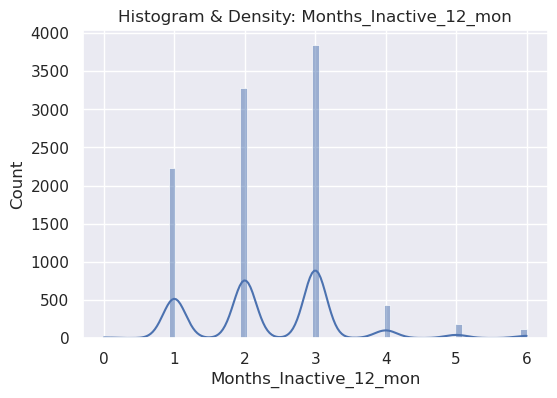

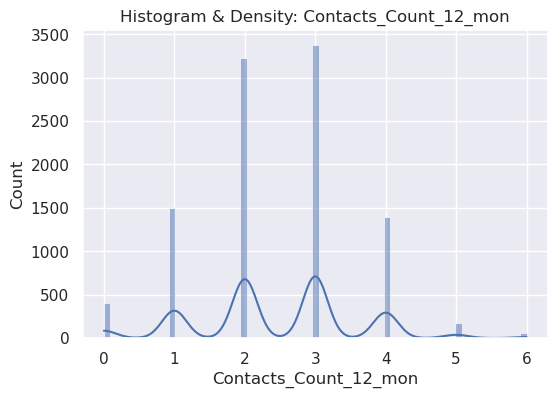

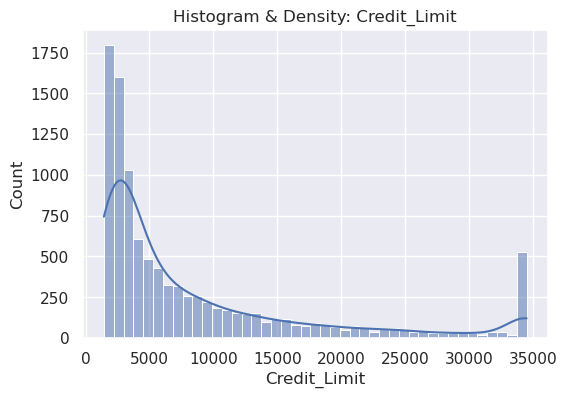

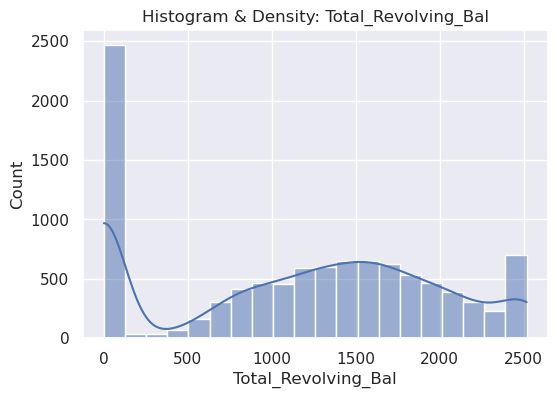

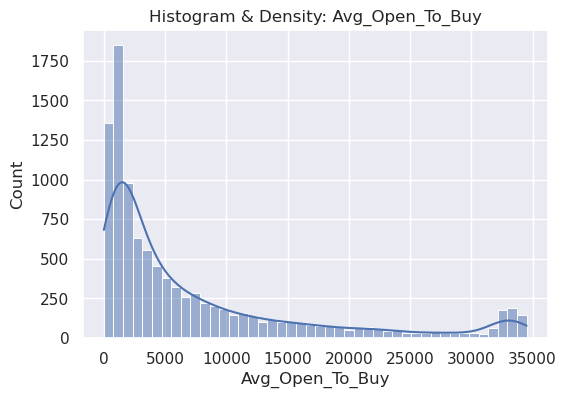

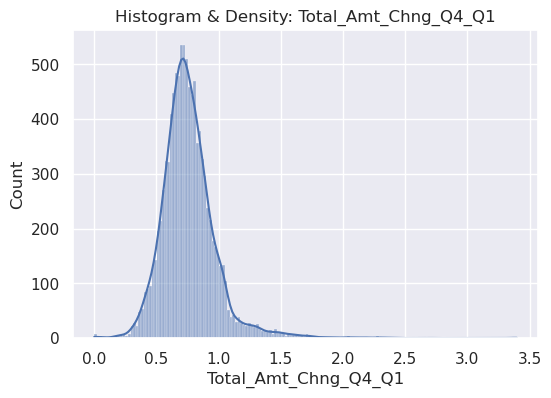

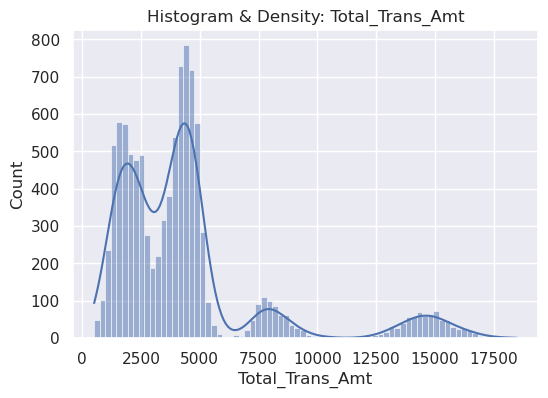

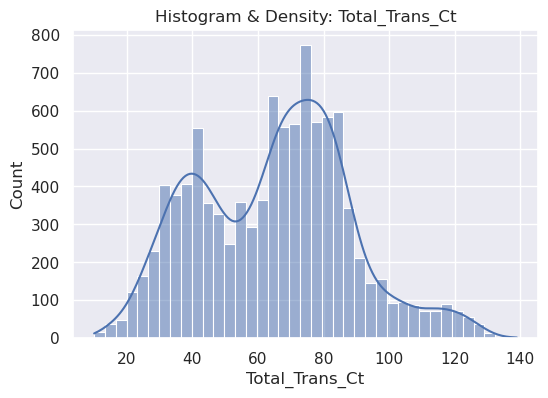

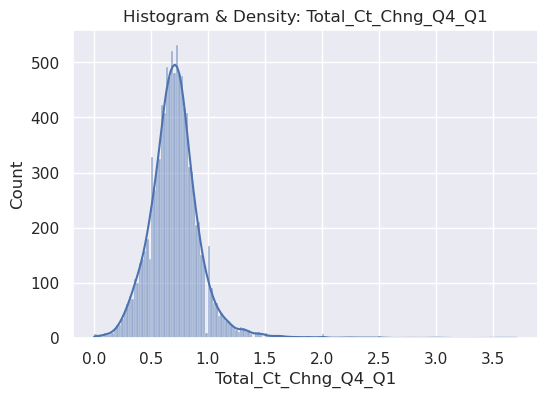

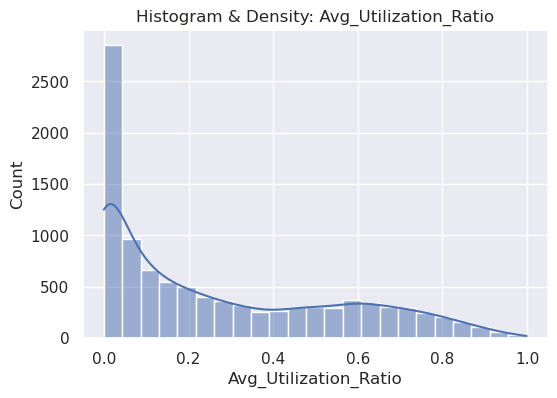

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram & Density: {col}")
    plt.show()

##### Calculate: mean, median, standard deviation

In [16]:
stats = df[numerical_cols].agg(['mean', 'median', 'std']).T
stats

,mean,median,std
Customer_Age,46.325960,46.000,8.016814
Dependent_count,2.346203,2.000,1.298908
Months_on_book,35.928409,36.000,7.986416
Total_Relationship_Count,3.812580,4.000,1.554408
Months_Inactive_12_mon,2.341167,2.000,1.010622
Contacts_Count_12_mon,2.455317,2.000,1.106225
Credit_Limit,8631.953698,4549.000,9088.776650
Total_Revolving_Bal,1162.814061,1276.000,814.987335
Avg_Open_To_Buy,7469.139637,3474.000,9090.685324
Total_Amt_Chng_Q4_Q1,0.759941,0.736,0.219207


#### Range & Outliers
Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị median
- Giá trị max

In [17]:
num_summary_rows = []
for col in numerical_cols:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    mean_val = s.mean()
    min_val = s.min()
    q1 = s.quantile(0.25)
    median_val = s.median()
    q3 = s.quantile(0.75)
    max_val = s.max()
    num_summary_rows.append({
        'column': col,
        'num_missing': missing,
        'missing_%': missing_pct,
        'mean': mean_val,
        'min': min_val,
        'q1': q1,
        'median': median_val,
        'q3': q3,
        'max': max_val
    })
num_summary_df = pd.DataFrame(num_summary_rows)
num_summary_df

,column,num_missing,missing_%,mean,min,q1,median,q3,max
0,Customer_Age,0,0.0,46.325960,26.0,41.000,46.000,52.000,73.000
1,Dependent_count,0,0.0,2.346203,0.0,1.000,2.000,3.000,5.000
2,Months_on_book,0,0.0,35.928409,13.0,31.000,36.000,40.000,56.000
3,Total_Relationship_Count,0,0.0,3.812580,1.0,3.000,4.000,5.000,6.000
4,Months_Inactive_12_mon,0,0.0,2.341167,0.0,2.000,2.000,3.000,6.000
5,Contacts_Count_12_mon,0,0.0,2.455317,0.0,2.000,2.000,3.000,6.000
6,Credit_Limit,0,0.0,8631.953698,1438.3,2555.000,4549.000,11067.500,34516.000
7,Total_Revolving_Bal,0,0.0,1162.814061,0.0,359.000,1276.000,1784.000,2517.000
8,Avg_Open_To_Buy,0,0.0,7469.139637,3.0,1324.500,3474.000,9859.000,34516.000
9,Total_Amt_Chng_Q4_Q1,0,0.0,0.759941,0.0,0.631,0.736,0.859,3.397


##### Outliers Detection

In [18]:
# IQR outlier detection
outlier_rows = []
for col in numerical_cols:
    s = df[col].dropna()
    if s.nunique() < 5:
        continue
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    outlier_rows.append({"column": col, "outliers": mask.sum(), "percent": round(mask.sum()/len(s)*100,2)})

pd.DataFrame(outlier_rows)

,column,outliers,percent
0,Customer_Age,2,0.02
1,Dependent_count,0,0.00
2,Months_on_book,386,3.81
3,Total_Relationship_Count,0,0.00
4,Months_Inactive_12_mon,331,3.27
5,Contacts_Count_12_mon,629,6.21
6,Credit_Limit,984,9.72
7,Total_Revolving_Bal,0,0.00
8,Avg_Open_To_Buy,963,9.51
9,Total_Amt_Chng_Q4_Q1,396,3.91


#### Data Quality

### Categorical Columns Analysis

Tương tự như numerical columns, ta cũng lọc các cột categorical

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số và các cột có dạng số nhưng có ít hơn 5 giá trị khác nhau, ta sẽ tính:

- Số các giá trị thiếu và tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu) 
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

In [20]:
# Thống kê nhóm biến categorical
cat_summary_rows = []
for col in categorical_cols:
    s = df[col]
    missing = s.isna().sum()
    missing_pct = round(missing/len(s)*100,2)
    unique_vals = s.nunique(dropna=True)
 
    value_pct = (s.value_counts(normalize=True, dropna=True)*100).round(2).to_dict()
    cat_summary_rows.append({
        'column': col,
        'num_missing': missing,
        'missing_%': missing_pct,
        'unique_values': unique_vals,
        'value_percentages': value_pct
    })
cat_summary_df = pd.DataFrame(cat_summary_rows)
cat_summary_df

,column,num_missing,missing_%,unique_values,value_percentages
0,Attrition_Flag,0,0.0,2,"{'Existing Customer': 83.93, 'Attrited Custome..."
1,Gender,0,0.0,2,"{'F': 52.91, 'M': 47.09}"
2,Education_Level,0,0.0,7,"{'Graduate': 30.89, 'High School': 19.88, 'Unk..."
3,Marital_Status,0,0.0,4,"{'Married': 46.28, 'Single': 38.94, 'Unknown':..."
4,Income_Category,0,0.0,6,"{'Less than $40K': 35.16, '$40K - $60K': 17.68..."
5,Card_Category,0,0.0,4,"{'Blue': 93.18, 'Silver': 5.48, 'Gold': 1.15, ..."


#### Visualization

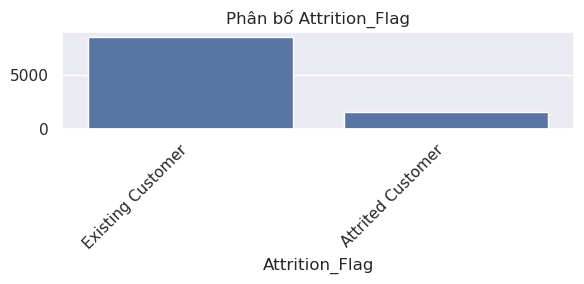

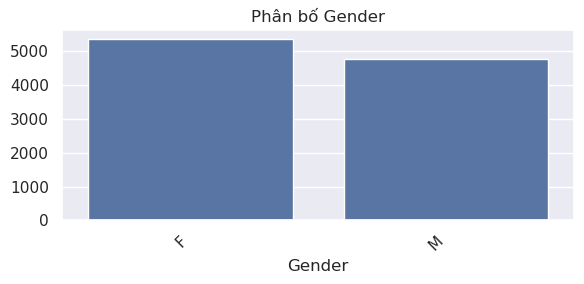

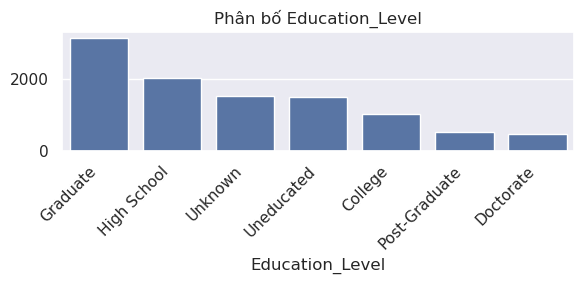

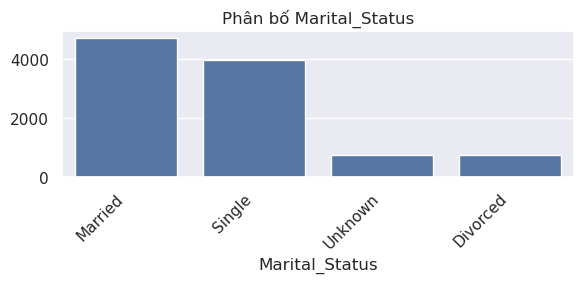

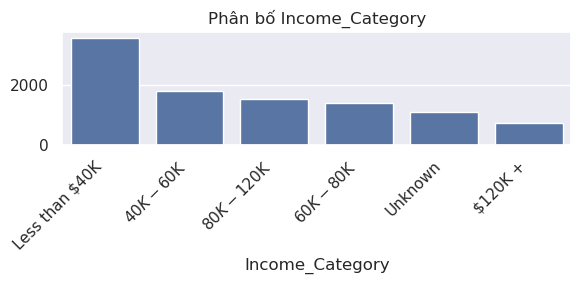

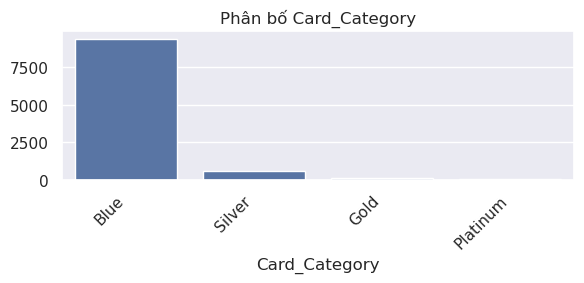

In [21]:
for col in categorical_cols:
    vc = df[col].value_counts(dropna=False)
    if vc.shape[0] <= 15:
        plt.figure(figsize=(6,3))
        sns.barplot(x=vc.index.astype(str), y=vc.values)
        plt.title(f'Phân bố {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Nhìn nhanh vào các biến phân loại cho thấy khách hàng còn sử dụng thẻ (Existing) chiếm đa số (~84%), hạng thẻ Blue áp đảo, trong khi các hạng cao hơn và trạng thái churn khá ít nên cần cân nhắc kỹ khi trực quan hoặc xây dựng mô hình.

### Sơ lược mối tương quan giữa các cột

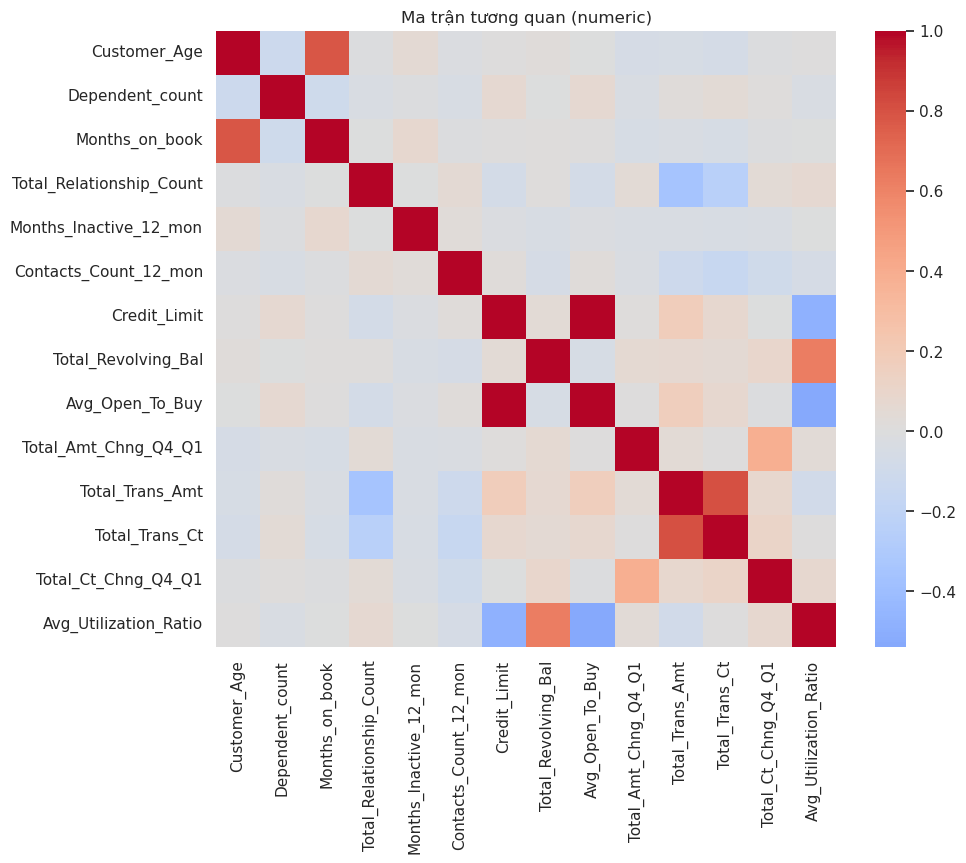

In [22]:
# Heatmap tương quan
corr = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Ma trận tương quan (numeric)")
plt.show()

## IV. Đặt câu hỏi và thực hiện phân tích dữ liệu
(Sẽ bổ sung sau: câu hỏi nghiên cứu, phân tích sâu, trực quan nâng cao.)

## V. Tổng kết


(Hiện tại: Đã khám phá cấu trúc, phân bố, outlier, tương quan cho bài toán churn. Hướng phát triển: xử lý mất cân bằng lớp, thử mô hình ML, phân tích tầm ảnh hưởng của các biến hành vi giao dịch.)

## VI. Tài liệu tham khảo
1. Kaggle Credit Card Customers (BankChurners) dataset.
2. IBM Sample Data – Predict Customer Churn (tài liệu mô tả biến).
3. Phương pháp thống kê mô tả, phát hiện outlier (IQR) và tiền xử lý churn.